# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 1/15/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 1/15/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,2305,38928341,5.9
Albania,7644,2877800,265.6
Algeria,3222,43851043,7.3
Andorra,780,77265,1009.5
Angola,1071,32866268,3.3
Antigua and Barbuda,25,97928,25.5
Argentina,148213,45195777,327.9
Armenia,4174,2963234,140.9
Australia,205,25459700,0.8


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Ireland,69622,4937796,1410.0
Czechia,139136,10708982,1299.2
Israel,100250,8655541,1158.2
Slovenia,22673,2078932,1090.6
United Kingdom,718100,67886004,1057.8
Portugal,104599,10196707,1025.8
Andorra,780,77265,1009.5
San Marino,339,33938,998.9
Panama,41828,4314768,969.4


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

1/11/21    1941116.0
1/12/21    1968326.0
1/13/21    1993892.0
1/14/21    2015235.0
1/15/21    2023828.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

1/2/21         NaN
1/3/21     10356.0
1/4/21     12320.0
1/5/21     18349.0
1/6/21     26663.0
1/7/21     45333.0
1/8/21     19077.0
1/9/21     22824.0
1/10/21      948.0
1/11/21    11706.0
1/12/21    27210.0
1/13/21    25566.0
1/14/21    21343.0
1/15/21     8593.0
Name: Germany, dtype: float64

<AxesSubplot:>

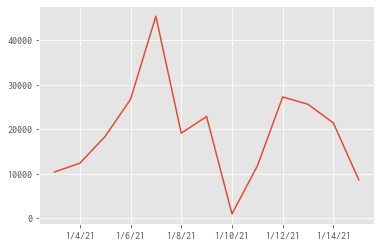

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83783945.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

298.73026389483095